In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [12]:
relevant_errors = ['missingIncludeSystem',
'noExplicitConstructor',
'unusedFunction',
'checkersReport',
'unreadVariable',
'variableScope',
'uninitMemberVar',
'useStlAlgorithm',
'shadowVariable',
'passedByValue',
'constParameterReference',
'unusedVariable',
'missingInclude',
'unusedStructMember',
'knownConditionTrueFalse',
'missingReturn',
'constParameterPointer',
'constVariableReference',
'uninitStructMember',
'syntaxError',
'stlFindInsert',
'uninitvar',
'containerOutOfBounds',
'shadowArgument',
'duplicateExpression',
'shadowFunction',
'constParameterCallback',
'constVariable',
'selfAssignment',
'iterateByValue',
'constStatement',
'negativeContainerIndex',
'useInitializationList',
'redundantCondition',
'multiCondition',
'noConstructor',
'unreachableCode',
'knownEmptyContainer',
'selfInitialization',
'legacyUninitvar',
'clarifyCondition',
'internalAstError',
'identicalInnerCondition',
'duplicateBreak']

error_indexes = {val: idx for idx, val in enumerate(relevant_errors)}




In [14]:
def counter(filename):
    file = open(filename)
    file_json = json.load(file)
    list_dicts_results = [{'WA': 0, 'CE': 0, 'RTE': 0, 'TLE':0, 'AC': 0} for _ in relevant_errors]
    for envio in file_json:
        try:
            judge_result = file_json[envio]['judge_result']
            
            for error in file_json[envio]['error_list']:
                index = error_indexes[error['error_name']]
                list_dicts_results[index][judge_result] += 1
        except KeyError:
            continue
    return list_dicts_results

In [15]:
list_dicts_results = counter('claseCppcheck.json')
for i, dic in enumerate(list_dicts_results):
    list_dicts_results[i] = {key:dic[key] for key in dic.keys() if dic[key] > 0}
    
for error, dic in zip(relevant_errors, list_dicts_results):
    print(error, ': ', dic)

missingIncludeSystem :  {'WA': 4404, 'CE': 1118, 'RTE': 1335, 'TLE': 1763, 'AC': 6951}
noExplicitConstructor :  {'WA': 1174, 'CE': 294, 'RTE': 322, 'TLE': 362, 'AC': 1851}
unusedFunction :  {'WA': 1013, 'CE': 311, 'RTE': 313, 'TLE': 346, 'AC': 1621}
checkersReport :  {'WA': 640, 'CE': 185, 'RTE': 168, 'TLE': 233, 'AC': 957}
unreadVariable :  {'WA': 108, 'CE': 21, 'RTE': 35, 'TLE': 39, 'AC': 96}
variableScope :  {'WA': 95, 'CE': 19, 'RTE': 12, 'TLE': 34, 'AC': 45}
uninitMemberVar :  {'WA': 49, 'CE': 12, 'RTE': 3, 'TLE': 10, 'AC': 46}
useStlAlgorithm :  {'WA': 20, 'CE': 16, 'RTE': 16, 'TLE': 14, 'AC': 48}
shadowVariable :  {'WA': 34, 'CE': 10, 'RTE': 1, 'TLE': 12, 'AC': 38}
passedByValue :  {'WA': 16, 'CE': 3, 'RTE': 18, 'TLE': 26, 'AC': 28}
constParameterReference :  {'WA': 22, 'CE': 7, 'RTE': 17, 'TLE': 7, 'AC': 32}
unusedVariable :  {'WA': 17, 'CE': 5, 'RTE': 23, 'TLE': 8, 'AC': 17}
missingInclude :  {'CE': 65, 'RTE': 1, 'TLE': 1, 'AC': 1}
unusedStructMember :  {'WA': 13, 'CE': 6, 'RT

In [16]:
list_dict_percentages = []

for i, dic in enumerate(list_dicts_results):
    s = sum(dic.values())
    dic_percentage = {key:str(round((dic[key] * 100.0 / s), 2)) + "%" for key in dic.keys()}
    list_dict_percentages.append(dic_percentage)

for error, dic in zip(relevant_errors, list_dict_percentages):
    print(error, ': ', dic)

missingIncludeSystem :  {'WA': '28.28%', 'CE': '7.18%', 'RTE': '8.57%', 'TLE': '11.32%', 'AC': '44.64%'}
noExplicitConstructor :  {'WA': '29.33%', 'CE': '7.34%', 'RTE': '8.04%', 'TLE': '9.04%', 'AC': '46.24%'}
unusedFunction :  {'WA': '28.11%', 'CE': '8.63%', 'RTE': '8.68%', 'TLE': '9.6%', 'AC': '44.98%'}
checkersReport :  {'WA': '29.32%', 'CE': '8.47%', 'RTE': '7.7%', 'TLE': '10.67%', 'AC': '43.84%'}
unreadVariable :  {'WA': '36.12%', 'CE': '7.02%', 'RTE': '11.71%', 'TLE': '13.04%', 'AC': '32.11%'}
variableScope :  {'WA': '46.34%', 'CE': '9.27%', 'RTE': '5.85%', 'TLE': '16.59%', 'AC': '21.95%'}
uninitMemberVar :  {'WA': '40.83%', 'CE': '10.0%', 'RTE': '2.5%', 'TLE': '8.33%', 'AC': '38.33%'}
useStlAlgorithm :  {'WA': '17.54%', 'CE': '14.04%', 'RTE': '14.04%', 'TLE': '12.28%', 'AC': '42.11%'}
shadowVariable :  {'WA': '35.79%', 'CE': '10.53%', 'RTE': '1.05%', 'TLE': '12.63%', 'AC': '40.0%'}
passedByValue :  {'WA': '17.58%', 'CE': '3.3%', 'RTE': '19.78%', 'TLE': '28.57%', 'AC': '30.77%'}


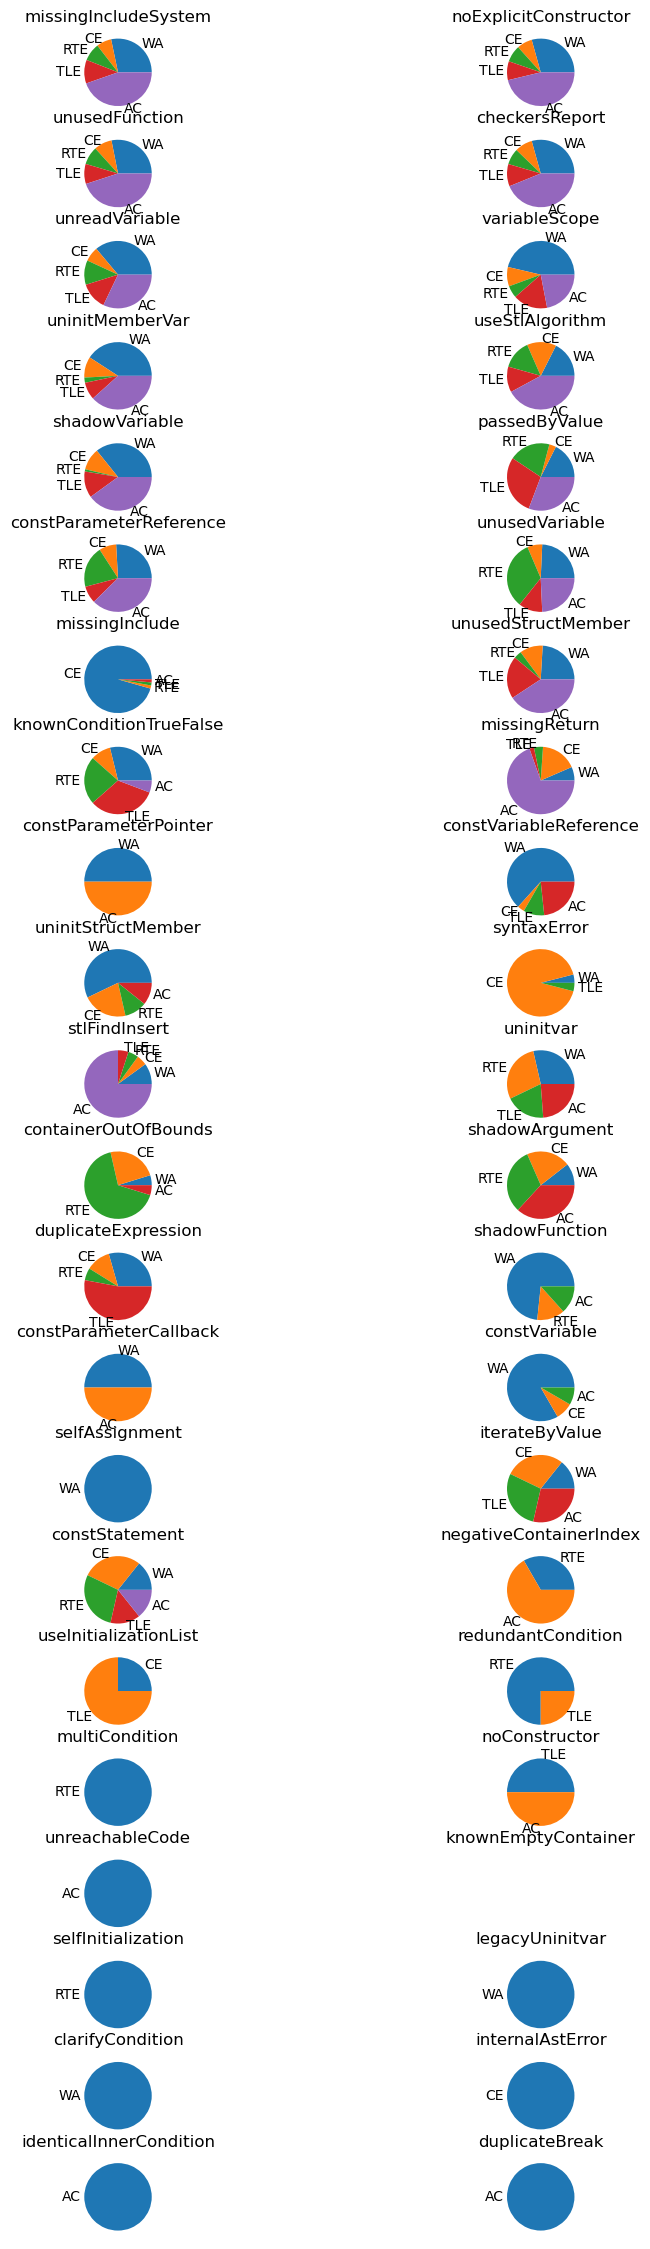

In [17]:
plt.rcParams['figure.figsize'] = [10, 30]
count = 1

# Define a custom color dictionary
custom_colors = {'AC': 'green', 'WA': 'red', 'TLE': 'yellow', 'RTE': 'orange', 'CE': 'black','OLE': 'blue'}

for error, dic in zip(relevant_errors, list_dicts_results):
    plt.subplot(len(relevant_errors)//2+1, 2, count)
    plt.pie(dic.values(), labels=dic.keys(), colors=[custom_colors.get(label, 'blue') for label in dic.keys()])
    plt.title(error)
    count += 1

plt.savefig('results_per_error.png')